# K-MEAN CLUSTERING

In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('../Datasets/ShopData.csv')

In [6]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [9]:
df.shape

(200, 5)

In [11]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [13]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [40]:
sil_scores = []
scre = 0; kn = 2; kmx = 9
for k in range(2, kmx):
    kmeans = KMeans(n_clusters=k, init= 'k-means++')
    labels = kmeans.fit_predict(data)
    sil_score = silhouette_score(data, labels)

    if scre < sil_score:
        scre = sil_score
        kn = k

    sil_scores.append(sil_score)
    print('silhouette Score:', sil_score)

print(kn, ':', scre)

silhouette Score: 0.39564531743995546
silhouette Score: 0.3715281236602886
silhouette Score: 0.4931963109249047
silhouette Score: 0.5532176107575425
silhouette Score: 0.5428234160403222
silhouette Score: 0.41937204490856156
silhouette Score: 0.45562906517208146
5 : 0.5532176107575425


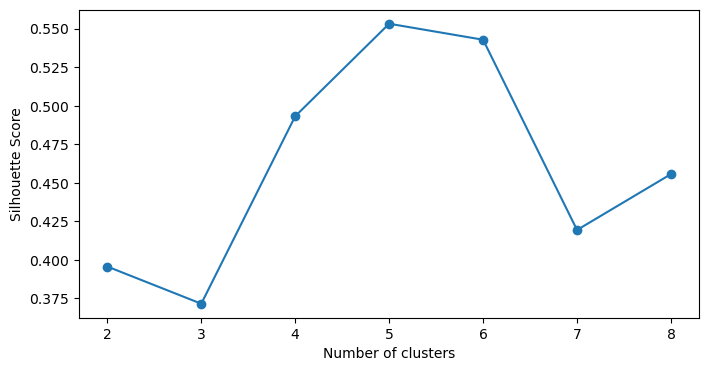

In [42]:
frame = pd.DataFrame({'Cluster': range(2, 9), 'Silhouette Score': sil_scores})
plt.figure(figsize=(8, 4))
plt.plot(frame['Cluster'], frame['Silhouette Score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score');